In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
dataset = pd.read_csv('train.csv')
print(dataset.columns.values)
print(dataset.shape)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

(array([  18.,  132., 1136.,   58.,    5.,   37.,   60.,    7.,    0.,
           7.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

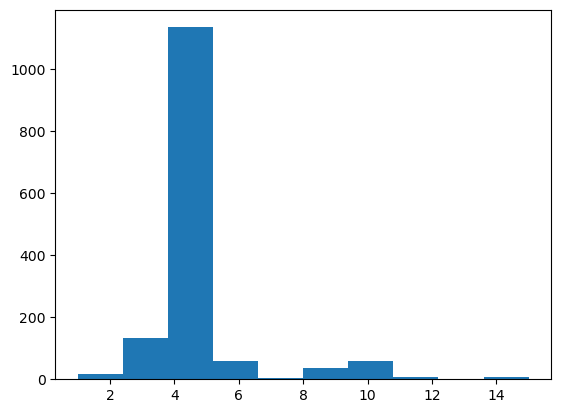

In [9]:
nan_count_per_row = dataset.isna().sum(axis=1)
plt.hist(nan_count_per_row)

<AxesSubplot: >

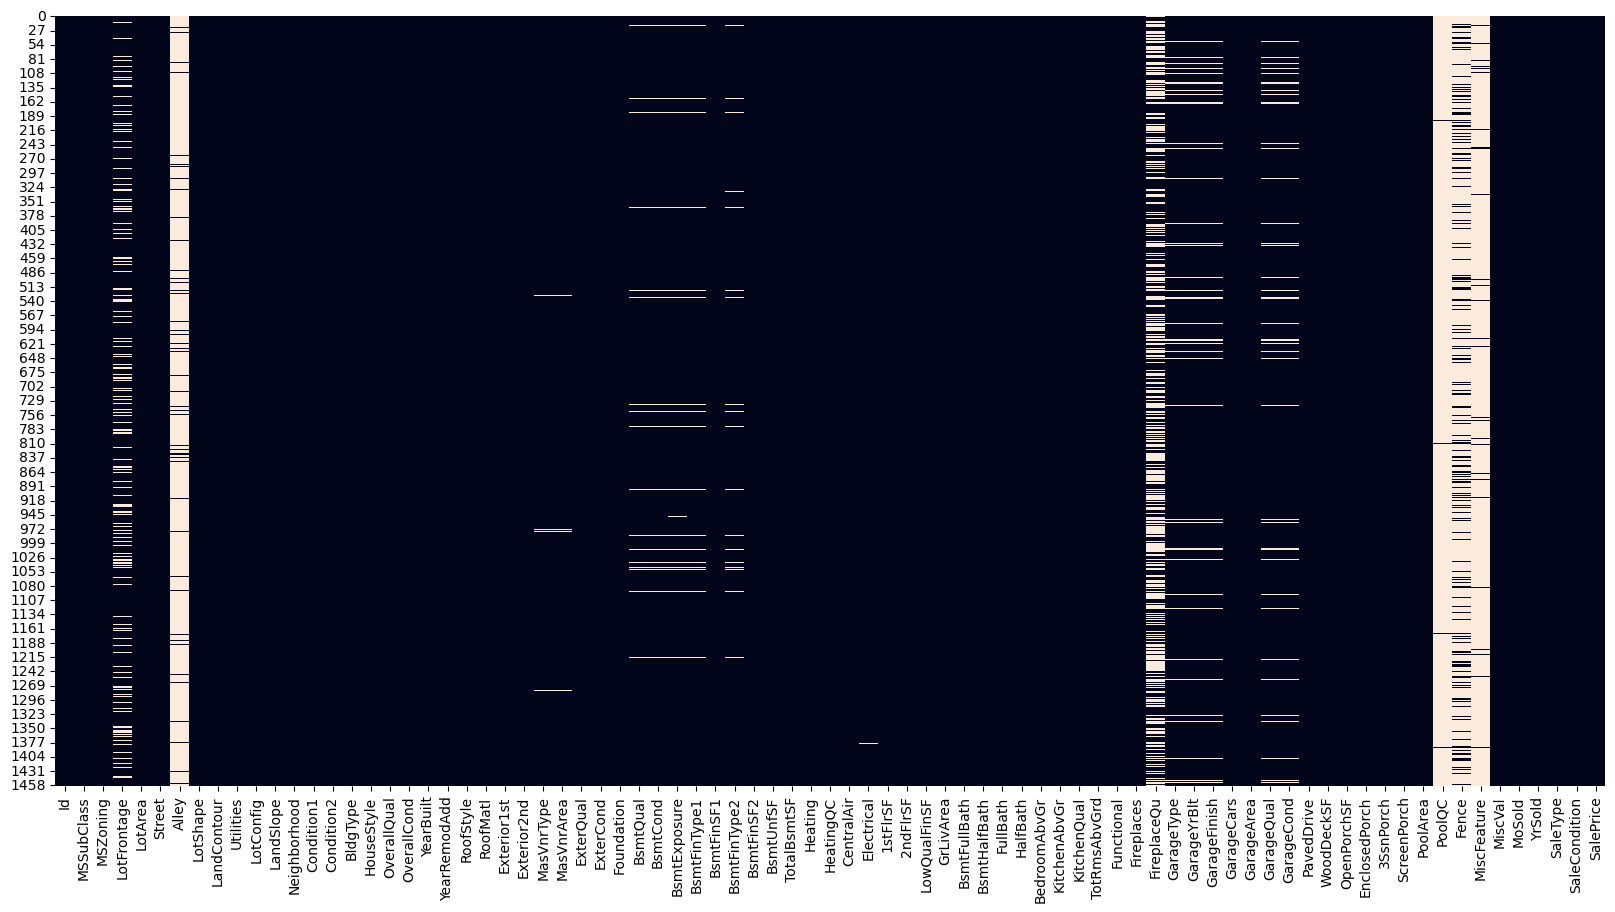

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isna(), cbar=False)

## Visualisation de la target

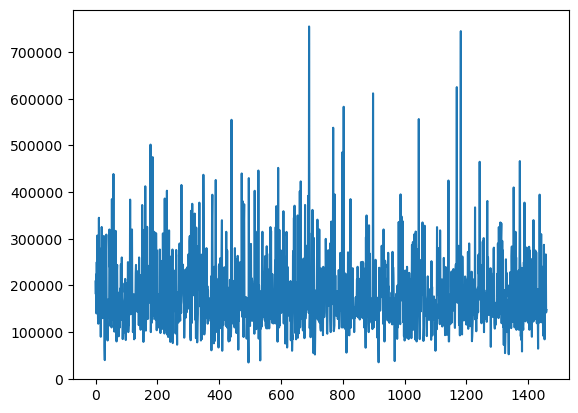

In [20]:
plt.plot(dataset['SalePrice'])

/tmp/ipykernel_5794/616686246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr()[['SalePrice']], annot=True, cmap='coolwarm')


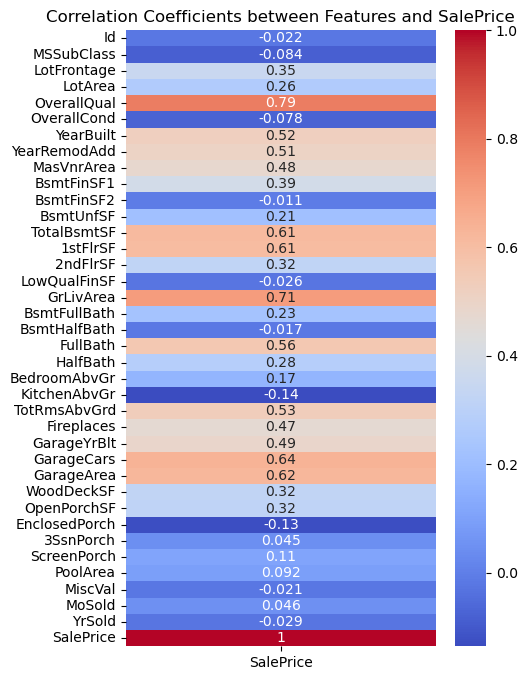

In [30]:
plt.figure(figsize=(5, 8))
sns.heatmap(dataset.corr()[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients between Features and SalePrice')
plt.show()

In [31]:
corr_matrix = dataset.corr()[['SalePrice']]
high_corr_features = corr_matrix[corr_matrix > 0.60]
high_corr_features = high_corr_features.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1.0]
high_corr_features = high_corr_features.drop_duplicates()
print(high_corr_features)


SalePrice  OverallQual    0.790982
           GrLivArea      0.708624
           GarageCars     0.640409
           GarageArea     0.623431
           TotalBsmtSF    0.613581
           1stFlrSF       0.605852
           Id                  NaN
dtype: float64


/tmp/ipykernel_5794/627541891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()[['SalePrice']]


On peut constater qu'il y a une correlation intéressante entre la target et les variaibles numériques suivantes:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF

In [33]:
dataset['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64